In [2]:
import os
import glob
import matplotlib.pyplot as plt

import torch
import numpy as np
from PIL import Image
from ignite.metrics import PSNR, SSIM
from torchvision import transforms
from torchvision.utils import save_image
import torchvision.transforms.functional as TF

In [5]:
pic_name = 108005
img_hr_path = f'../results/1/test_labels/large_test/{pic_name}.png'
img_lr_path = f'../results/test/large_test/{pic_name}.png'

img_hr = transforms.ToTensor()(Image.open(img_hr_path))
img_lr = transforms.ToTensor()(Image.open(img_lr_path))



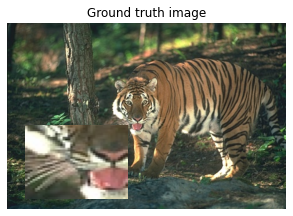

In [16]:
fig, ax = plt.subplots(figsize=[5, 4])
img_hr_zoom = img_hr[:, 150:191, 190:231]
extent = (0, img_hr.shape[2], img_hr.shape[1], 0)
ax.imshow(img_hr.permute(1,2,0), extent=extent, origin="upper")
ax.axis('off')
plt.title('Ground truth image')
axins = ax.inset_axes([0.05, 0.05, 0.4, 0.4])
axins.imshow(img_hr_zoom.permute(1,2,0), extent=extent, origin="upper")
axins.axis('off')
plt.show()
fig.savefig('../results/tiger_hr_original.png')



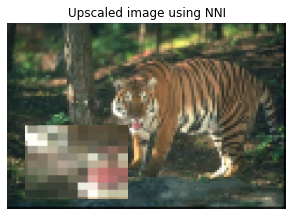

In [13]:
img_lr_resized = transforms.Resize(size=[img_hr.shape[1], img_hr.shape[2]], interpolation=Image.NEAREST)(transforms.ToPILImage()(img_lr))
img_lr_resized = transforms.ToTensor()(img_lr_resized)

fig, ax = plt.subplots(figsize=[5, 4])
img_lr_zoom = img_lr_resized[:, 150:191, 190:231]
extent = (0, img_lr_resized.shape[2], img_lr_resized.shape[1], 0)
ax.imshow(img_lr_resized.permute(1,2,0), extent=extent, origin="upper")
ax.axis('off')
plt.title('Upscaled image using NNI')
axins = ax.inset_axes([0.05, 0.05, 0.4, 0.4])
axins.imshow(img_lr_zoom.permute(1,2,0), extent=extent, origin="upper")
axins.axis('off')
plt.show()
fig.savefig('../results/tiger_lr_nni.png')

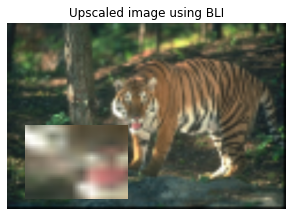

In [14]:
img_lr_resized = transforms.Resize(size=[img_hr.shape[1], img_hr.shape[2]], interpolation=Image.BILINEAR)(transforms.ToPILImage()(img_lr))
img_lr_resized = transforms.ToTensor()(img_lr_resized)

fig, ax = plt.subplots(figsize=[5, 4])
img_lr_zoom = img_lr_resized[:, 150:191, 190:231]
extent = (0, img_lr_resized.shape[2], img_lr_resized.shape[1], 0)
ax.imshow(img_lr_resized.permute(1,2,0), extent=extent, origin="upper")
ax.axis('off')
plt.title('Upscaled image using BLI')
axins = ax.inset_axes([0.05, 0.05, 0.4, 0.4])
axins.imshow(img_lr_zoom.permute(1,2,0), extent=extent, origin="upper")
axins.axis('off')
plt.show()
fig.savefig('../results/tiger_lr_bli.png')

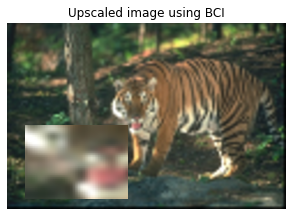

In [15]:
img_lr_resized = transforms.Resize(size=[img_hr.shape[1], img_hr.shape[2]], interpolation=Image.BICUBIC)(transforms.ToPILImage()(img_lr))
img_lr_resized = transforms.ToTensor()(img_lr_resized)

fig, ax = plt.subplots(figsize=[5, 4])
img_lr_zoom = img_lr_resized[:, 150:191, 190:231]
extent = (0, img_lr_resized.shape[2], img_lr_resized.shape[1], 0)
ax.imshow(img_lr_resized.permute(1,2,0), extent=extent, origin="upper")
ax.axis('off')
plt.title('Upscaled image using BCI')
axins = ax.inset_axes([0.05, 0.05, 0.4, 0.4])
axins.imshow(img_lr_zoom.permute(1,2,0), extent=extent, origin="upper")
axins.axis('off')
plt.show()
fig.savefig('../results/tiger_lr_bci.png')

hr shape: torch.Size([3, 768, 1024])
lr shape: torch.Size([3, 192, 256])


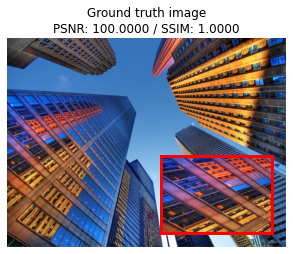

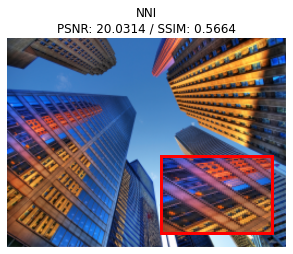

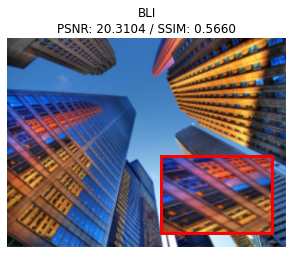

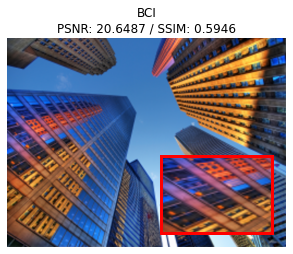

In [84]:
pic_name = 'img_012'

img_hr_path = f'../results/1/test_labels/structures/{pic_name}.png'
img_lr_path = f'../results/test/structures/{pic_name}.png'

img_hr = transforms.ToTensor()(Image.open(img_hr_path))
img_lr = transforms.ToTensor()(Image.open(img_lr_path))

print(f'hr shape: {img_hr.shape}')
print(f'lr shape: {img_lr.shape}')

ssim = SSIM(data_range=1.0)
psnr = PSNR(data_range=1.0)

ssim.update((img_hr.unsqueeze(0), img_hr.unsqueeze(0)))
ssim_acc = ssim.compute()
ssim.reset()
psnr.update((img_hr.unsqueeze(0), img_hr.unsqueeze(0)))
psnr_acc = psnr.compute()
psnr.reset()

fig, ax = plt.subplots(figsize=[5, 4])
img_hr_zoom = img_hr[:, 280:521, 0:221]
extent = (0, img_hr.shape[2], img_hr.shape[1], 0)
ax.imshow(img_hr.permute(1,2,0), extent=extent, origin="upper")
ax.axis('off')
plt.title(f'Ground truth image\nPSNR: {psnr_acc:0.4f} / SSIM: {ssim_acc:0.4f}')
axins = ax.inset_axes([0.55, 0.05, 0.4, 0.4])
axins.imshow(img_hr_zoom.permute(1,2,0), extent=extent, origin="upper")
axins.tick_params(axis='both',          
                  which='both',      
                  bottom=False,      
                  top=False,
                  left=False,
                  right=False,         
                  labelbottom=False,
                  labelleft=False,
                  labelright=False)
for spine in axins.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(3)
plt.show()
fig.savefig('../results/building_original.png')

img_lr_resized = transforms.Resize(size=[img_hr.shape[1], img_hr.shape[2]], 
                                   interpolation=Image.NEAREST)(transforms.ToPILImage()(img_lr))
img_lr_resized = transforms.ToTensor()(img_lr_resized)

ssim.update((img_hr.unsqueeze(0), img_lr_resized.unsqueeze(0)))
ssim_acc = ssim.compute()
ssim.reset()
psnr.update((img_hr.unsqueeze(0), img_lr_resized.unsqueeze(0)))
psnr_acc = psnr.compute()
psnr.reset()


fig, ax = plt.subplots(figsize=[5, 4])
img_lr_resized_zoom = img_lr_resized[:, 280:521, 0:221]
extent = (0, img_lr_resized.shape[2], img_lr_resized.shape[1], 0)
ax.imshow(img_lr_resized.permute(1,2,0), extent=extent, origin="upper")
ax.axis('off')
plt.title(f'NNI\nPSNR: {psnr_acc:0.4f} / SSIM: {ssim_acc:0.4f}')
axins = ax.inset_axes([0.55, 0.05, 0.4, 0.4])
axins.imshow(img_lr_resized_zoom.permute(1,2,0), extent=extent, origin="upper")
axins.tick_params(axis='both',          
                  which='both',      
                  bottom=False,      
                  top=False,
                  left=False,
                  right=False,         
                  labelbottom=False,
                  labelleft=False,
                  labelright=False)
for spine in axins.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(3)
plt.show()
fig.savefig('../results/building_nni.png')

img_lr_resized = transforms.Resize(size=[img_hr.shape[1], img_hr.shape[2]], 
                                   interpolation=Image.BILINEAR)(transforms.ToPILImage()(img_lr))
img_lr_resized = transforms.ToTensor()(img_lr_resized)

ssim.update((img_hr.unsqueeze(0), img_lr_resized.unsqueeze(0)))
ssim_acc = ssim.compute()
ssim.reset()
psnr.update((img_hr.unsqueeze(0), img_lr_resized.unsqueeze(0)))
psnr_acc = psnr.compute()
psnr.reset()

fig, ax = plt.subplots(figsize=[5, 4])
img_lr_resized_zoom = img_lr_resized[:, 280:521, 0:221]
extent = (0, img_lr_resized.shape[2], img_lr_resized.shape[1], 0)
ax.imshow(img_lr_resized.permute(1,2,0), extent=extent, origin="upper")
ax.axis('off')
plt.title(f'BLI\nPSNR: {psnr_acc:0.4f} / SSIM: {ssim_acc:0.4f}')
axins = ax.inset_axes([0.55, 0.05, 0.4, 0.4])
axins.imshow(img_lr_resized_zoom.permute(1,2,0), extent=extent, origin="upper")
axins.tick_params(axis='both',          
                  which='both',      
                  bottom=False,      
                  top=False,
                  left=False,
                  right=False,         
                  labelbottom=False,
                  labelleft=False,
                  labelright=False)
for spine in axins.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(3)
plt.show()
fig.savefig('../results/building_bli.png')

img_lr_resized = transforms.Resize(size=[img_hr.shape[1], img_hr.shape[2]], 
                                   interpolation=Image.BICUBIC)(transforms.ToPILImage()(img_lr))
img_lr_resized = transforms.ToTensor()(img_lr_resized)

ssim.update((img_hr.unsqueeze(0), img_lr_resized.unsqueeze(0)))
ssim_acc = ssim.compute()
ssim.reset()
psnr.update((img_hr.unsqueeze(0), img_lr_resized.unsqueeze(0)))
psnr_acc = psnr.compute()
psnr.reset()

fig, ax = plt.subplots(figsize=[5, 4])
img_lr_resized_zoom = img_lr_resized[:, 280:521, 0:221]
extent = (0, img_lr_resized.shape[2], img_lr_resized.shape[1], 0)
ax.imshow(img_lr_resized.permute(1,2,0), extent=extent, origin="upper")
ax.axis('off')
plt.title(f'BCI\nPSNR: {psnr_acc:0.4f} / SSIM: {ssim_acc:0.4f}')
axins = ax.inset_axes([0.55, 0.05, 0.4, 0.4])
axins.imshow(img_lr_resized_zoom.permute(1,2,0), extent=extent, origin="upper")
axins.tick_params(axis='both',          
                  which='both',      
                  bottom=False,      
                  top=False,
                  left=False,
                  right=False,         
                  labelbottom=False,
                  labelleft=False,
                  labelright=False)
for spine in axins.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(3)
plt.show()
fig.savefig('../results/building_bci.png')





In [57]:
imgs_path = '../results/interpolation'

ssim = SSIM(data_range=1.0)
psnr = PSNR(data_range=1.0)

for img_set in ['comics', 'misc', 'structures']:
    for img_name in os.listdir(f'{imgs_path}/test_labels/{img_set}'):
        label_path = f'{imgs_path}/test_labels/{img_set}/{img_name}'
        lr_path = f'{imgs_path}/test_result/{img_set}/{img_name}'

        img_lbl = transforms.ToTensor()(Image.open(label_path))
        img_lr = transforms.ToTensor()(Image.open(lr_path))

        img_lr_resized = transforms.Resize(size=[img_lbl.shape[1], img_lbl.shape[2]], 
                                        interpolation=Image.BICUBIC)(transforms.ToPILImage()(img_lr))
        img_lr_resized = transforms.ToTensor()(img_lr_resized)

        ssim.update((img_lbl.unsqueeze(0), img_lr_resized.unsqueeze(0)))
        psnr.update((img_lbl.unsqueeze(0), img_lr_resized.unsqueeze(0)))
    ssim_acc = ssim.compute()
    ssim.reset()
    psnr_acc = psnr.compute()
    psnr.reset()

    print(f'PSNR for {img_set}: {psnr_acc:0.4f}')
    print(f'SSIM for {img_set}: {ssim_acc:0.4f}')





PSNR for comics: 21.5824
SSIM for comics: 0.7336
PSNR for misc: 21.5405
SSIM for misc: 0.5694
PSNR for structures: 21.7057
SSIM for structures: 0.6425


In [59]:
imgs_path = '../results/interpolation'

ssim = SSIM(data_range=1.0)
psnr = PSNR(data_range=1.0)

for img_set in ['comics', 'misc', 'structures']:
    for img_name in os.listdir(f'{imgs_path}/test_labels/{img_set}'):
        label_path = f'{imgs_path}/test_labels/{img_set}/{img_name}'
        lr_path = f'{imgs_path}/test_result/{img_set}/{img_name}'

        img_lbl = transforms.ToTensor()(Image.open(label_path))
        img_lr = transforms.ToTensor()(Image.open(lr_path))

        img_lr_resized = transforms.Resize(size=[img_lbl.shape[1], img_lbl.shape[2]], 
                                        interpolation=Image.BILINEAR)(transforms.ToPILImage()(img_lr))
        img_lr_resized = transforms.ToTensor()(img_lr_resized)

        ssim.update((img_lbl.unsqueeze(0), img_lr_resized.unsqueeze(0)))
        psnr.update((img_lbl.unsqueeze(0), img_lr_resized.unsqueeze(0)))
    ssim_acc = ssim.compute()
    ssim.reset()
    psnr_acc = psnr.compute()
    psnr.reset()

    print(f'PSNR for {img_set}: {psnr_acc:0.4f}')
    print(f'SSIM for {img_set}: {ssim_acc:0.4f}')

PSNR for comics: 21.3107
SSIM for comics: 0.7185
PSNR for misc: 21.5959
SSIM for misc: 0.5607
PSNR for structures: 21.2513
SSIM for structures: 0.6166


In [58]:
imgs_path = '../results/interpolation'

ssim = SSIM(data_range=1.0)
psnr = PSNR(data_range=1.0)

for img_set in ['comics', 'misc', 'structures']:
    for img_name in os.listdir(f'{imgs_path}/test_labels/{img_set}'):
        label_path = f'{imgs_path}/test_labels/{img_set}/{img_name}'
        lr_path = f'{imgs_path}/test_result/{img_set}/{img_name}'

        img_lbl = transforms.ToTensor()(Image.open(label_path))
        img_lr = transforms.ToTensor()(Image.open(lr_path))

        img_lr_resized = transforms.Resize(size=[img_lbl.shape[1], img_lbl.shape[2]], 
                                        interpolation=Image.NEAREST)(transforms.ToPILImage()(img_lr))
        img_lr_resized = transforms.ToTensor()(img_lr_resized)

        ssim.update((img_lbl.unsqueeze(0), img_lr_resized.unsqueeze(0)))
        psnr.update((img_lbl.unsqueeze(0), img_lr_resized.unsqueeze(0)))
    ssim_acc = ssim.compute()
    ssim.reset()
    psnr_acc = psnr.compute()
    psnr.reset()

    print(f'PSNR for {img_set}: {psnr_acc:0.4f}')
    print(f'SSIM for {img_set}: {ssim_acc:0.4f}')

PSNR for comics: 20.2975
SSIM for comics: 0.6904
PSNR for misc: 20.8267
SSIM for misc: 0.5292
PSNR for structures: 20.8377
SSIM for structures: 0.6139


In [65]:
imgs_path = '../results/srcae'

ssim = SSIM(data_range=1.0)
psnr = PSNR(data_range=1.0)

for img_set in ['comics', 'misc', 'structures']:
    for img_name in os.listdir(f'{imgs_path}/test_labels/{img_set}'):
        label_path = f'{imgs_path}/test_labels/{img_set}/{img_name}'
        out_path = f'{imgs_path}/test_result/{img_set}/{img_name}'

        img_lbl = transforms.ToTensor()(Image.open(label_path))
        img_out = transforms.ToTensor()(Image.open(out_path))

        if img_lbl.shape[0] == 1: continue

        img_out_resized = transforms.Resize(size=[img_lbl.shape[1], img_lbl.shape[2]], 
                                        interpolation=Image.NEAREST)(transforms.ToPILImage()(img_out))
        img_out_resized = transforms.ToTensor()(img_out_resized)

        ssim.update((img_lbl.unsqueeze(0), img_out_resized.unsqueeze(0)))
        psnr.update((img_lbl.unsqueeze(0), img_out_resized.unsqueeze(0)))
    ssim_acc = ssim.compute()
    ssim.reset()
    psnr_acc = psnr.compute()
    psnr.reset()

    print(f'PSNR for {img_set}: {psnr_acc:0.4f}')
    print(f'SSIM for {img_set}: {ssim_acc:0.4f}')

PSNR for comics: 21.0145
SSIM for comics: 0.7168
PSNR for misc: 21.3633
SSIM for misc: 0.5645
PSNR for structures: 21.7734
SSIM for structures: 0.6570


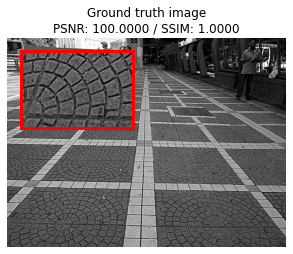

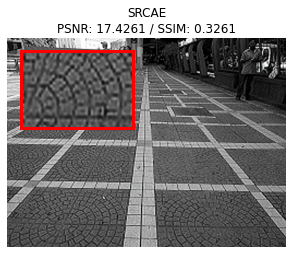

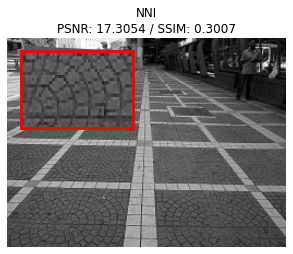

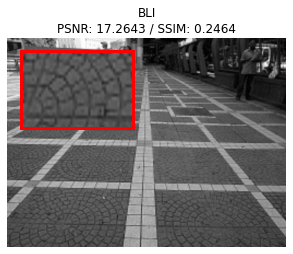

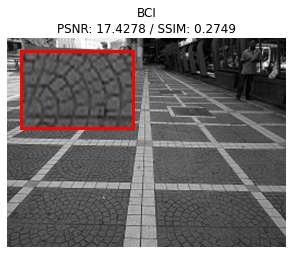

In [83]:
pic_name = 'img_095'

img_hr_path = f'../results/srcae/test_labels/structures/{pic_name}.png'
img_lr_path = f'../results/srcae/test_original/structures/{pic_name}.png'

img_hr = transforms.ToTensor()(Image.open(img_hr_path))
img_lr = transforms.ToTensor()(Image.open(img_lr_path))

ssim = SSIM(data_range=1.0)
psnr = PSNR(data_range=1.0)

ssim.update((img_hr.unsqueeze(0), img_hr.unsqueeze(0)))
ssim_acc = ssim.compute()
ssim.reset()
psnr.update((img_hr.unsqueeze(0), img_hr.unsqueeze(0)))
psnr_acc = psnr.compute()
psnr.reset()

fig, ax = plt.subplots(figsize=[5, 4])
img_hr_zoom = img_hr[:, 600:700, 200:400]
extent = (0, img_hr.shape[2], img_hr.shape[1], 0)
ax.imshow(img_hr.permute(1,2,0), extent=extent, origin="upper")
ax.axis('off')
plt.title(f'Ground truth image\nPSNR: {psnr_acc:0.4f} / SSIM: {ssim_acc:0.4f}')
axins = ax.inset_axes([0.05, 0.55, 0.4, 0.4])
axins.imshow(img_hr_zoom.permute(1,2,0), extent=extent, origin="upper")
axins.tick_params(axis='both',          
                  which='both',      
                  bottom=False,      
                  top=False,
                  left=False,
                  right=False,         
                  labelbottom=False,
                  labelleft=False,
                  labelright=False)
for spine in axins.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(3)
plt.show()
fig.savefig('../results/floor_original.png')

img_lr_out_path = f'../results/srcae/test_result/structures/{pic_name}.png'
img_lr_out = transforms.ToTensor()(Image.open(img_lr_out_path))

ssim.update((img_hr.unsqueeze(0), img_lr_out.unsqueeze(0)))
ssim_acc = ssim.compute()
ssim.reset()
psnr.update((img_hr.unsqueeze(0), img_lr_out.unsqueeze(0)))
psnr_acc = psnr.compute()
psnr.reset()

fig, ax = plt.subplots(figsize=[5, 4])
img_lr_out_zoom = img_lr_out[:, 600:700, 200:400]
extent = (0, img_lr_out.shape[2], img_lr_out.shape[1], 0)
ax.imshow(img_lr_out.permute(1,2,0), extent=extent, origin="upper")
ax.axis('off')
plt.title(f'SRCAE\nPSNR: {psnr_acc:0.4f} / SSIM: {ssim_acc:0.4f}')
axins = ax.inset_axes([0.05, 0.55, 0.4, 0.4])
axins.imshow(img_lr_out_zoom.permute(1,2,0), extent=extent, origin="upper")
axins.tick_params(axis='both',          
                  which='both',      
                  bottom=False,      
                  top=False,
                  left=False,
                  right=False,         
                  labelbottom=False,
                  labelleft=False,
                  labelright=False)
for spine in axins.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(3)
plt.show()
fig.savefig('../results/floor_srcae.png')

img_lr_resized = transforms.Resize(size=[img_hr.shape[1], img_hr.shape[2]], 
                                   interpolation=Image.NEAREST)(transforms.ToPILImage()(img_lr))
img_lr_resized = transforms.ToTensor()(img_lr_resized)

ssim.update((img_hr.unsqueeze(0), img_lr_resized.unsqueeze(0)))
ssim_acc = ssim.compute()
ssim.reset()
psnr.update((img_hr.unsqueeze(0), img_lr_resized.unsqueeze(0)))
psnr_acc = psnr.compute()
psnr.reset()


fig, ax = plt.subplots(figsize=[5, 4])
img_lr_resized_zoom = img_lr_resized[:, 600:700, 200:400]
extent = (0, img_lr_resized.shape[2], img_lr_resized.shape[1], 0)
ax.imshow(img_lr_resized.permute(1,2,0), extent=extent, origin="upper")
ax.axis('off')
plt.title(f'NNI\nPSNR: {psnr_acc:0.4f} / SSIM: {ssim_acc:0.4f}')
axins = ax.inset_axes([0.05, 0.55, 0.4, 0.4])
axins.imshow(img_lr_resized_zoom.permute(1,2,0), extent=extent, origin="upper")
axins.tick_params(axis='both',          
                  which='both',      
                  bottom=False,      
                  top=False,
                  left=False,
                  right=False,         
                  labelbottom=False,
                  labelleft=False,
                  labelright=False)
for spine in axins.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(3)
plt.show()
fig.savefig('../results/floor_nni.png')

img_lr_resized = transforms.Resize(size=[img_hr.shape[1], img_hr.shape[2]], 
                                   interpolation=Image.BILINEAR)(transforms.ToPILImage()(img_lr))
img_lr_resized = transforms.ToTensor()(img_lr_resized)

ssim.update((img_hr.unsqueeze(0), img_lr_resized.unsqueeze(0)))
ssim_acc = ssim.compute()
ssim.reset()
psnr.update((img_hr.unsqueeze(0), img_lr_resized.unsqueeze(0)))
psnr_acc = psnr.compute()
psnr.reset()

fig, ax = plt.subplots(figsize=[5, 4])
img_lr_resized_zoom = img_lr_resized[:, 600:700, 200:400]
extent = (0, img_lr_resized.shape[2], img_lr_resized.shape[1], 0)
ax.imshow(img_lr_resized.permute(1,2,0), extent=extent, origin="upper")
ax.axis('off')
plt.title(f'BLI\nPSNR: {psnr_acc:0.4f} / SSIM: {ssim_acc:0.4f}')
axins = ax.inset_axes([0.05, 0.55, 0.4, 0.4])
axins.imshow(img_lr_resized_zoom.permute(1,2,0), extent=extent, origin="upper")
axins.tick_params(axis='both',          
                  which='both',      
                  bottom=False,      
                  top=False,
                  left=False,
                  right=False,         
                  labelbottom=False,
                  labelleft=False,
                  labelright=False)
for spine in axins.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(3)
plt.show()
fig.savefig('../results/floor_bli.png')

img_lr_resized = transforms.Resize(size=[img_hr.shape[1], img_hr.shape[2]], 
                                   interpolation=Image.BICUBIC)(transforms.ToPILImage()(img_lr))
img_lr_resized = transforms.ToTensor()(img_lr_resized)

ssim.update((img_hr.unsqueeze(0), img_lr_resized.unsqueeze(0)))
ssim_acc = ssim.compute()
ssim.reset()
psnr.update((img_hr.unsqueeze(0), img_lr_resized.unsqueeze(0)))
psnr_acc = psnr.compute()
psnr.reset()

fig, ax = plt.subplots(figsize=[5, 4])
img_lr_resized_zoom = img_lr_resized[:, 600:700, 200:400]
extent = (0, img_lr_resized.shape[2], img_lr_resized.shape[1], 0)
ax.imshow(img_lr_resized.permute(1,2,0), extent=extent, origin="upper")
ax.axis('off')
plt.title(f'BCI\nPSNR: {psnr_acc:0.4f} / SSIM: {ssim_acc:0.4f}')
axins = ax.inset_axes([0.05, 0.55, 0.4, 0.4])
axins.imshow(img_lr_resized_zoom.permute(1,2,0), extent=extent, origin="upper")
axins.tick_params(axis='both',          
                  which='both',      
                  bottom=False,      
                  top=False,
                  left=False,
                  right=False,         
                  labelbottom=False,
                  labelleft=False,
                  labelright=False)
for spine in axins.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(3)
plt.show()
fig.savefig('../results/floor_bci.png')



